# Deep learning and AI methods
## Session 4: Prediction of fuel efficiency
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* For more information visit the [CANVAS class website](https://canvas.education.lu.se/courses/1712).

In this session we learn how to use *TensorFlow* and *Keras* for construction a nn solving a regression problem based on the data to predict fuel efficiency. We also learn several features of `DataFrame` class of provided by the library `pandas`.

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [209]:
# Use seaborn for pairplot
# !pip install -q seaborn

In [210]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


## Project 1 Initial exploration and preparation of the data set for regression
### The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).



### Get the data
First download the dataset.

In [211]:
# Set path to data
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/Sara/.keras/datasets/auto-mpg.data'

Import it using pandas into the `DataFrame` structure. Read more about `DataFrame` in [Pandas Data Frame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Below you will also learn more about the topic. 

In [212]:
# Specify column names
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

# Load data
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

# Create copy to work on (good practice)
dataset = raw_dataset.copy()

# Inspect last five rows
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [213]:
# Experiment: Inspect top ten rows
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [214]:
# Experiment: Inspect summary of MPG
dataset['MPG'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

## Task 1:

### Get another data from the same repository
For example there is the data set: https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

About which you can read here: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+predictionOrganize 
Organize the downloaded data in a similar fashion as the one above after reading the information about the nature of the data. 

Import it using pandas. For help on pandas check https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

#### Solution
I've chosen to download the fires dataset from the UCI ML repository. It's outcome variable is *area*, so the idea is to predict the area of a fire. The data is from the northeast region of Portugal and has a lot of meterological measures. The data was first analyzed by Cortez and Morais in 2007. I will therefore try to follow their procedure when dealing with the data.

In [215]:
# Set path
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# Read data
data = pd.read_csv(path)

In [216]:
# Inspect data
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


*Comment*: The data looks good.

In [217]:
# help(pd.read_csv)

### Clean the mileage data

The dataset contains a few unknown values.

In [218]:
# Summary of columns wiht NA values
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

To keep this initial tutorial simple drop those rows.

In [219]:
# Remove rows with NA
dataset = dataset.dropna()

The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

In [220]:
# Convert numerical value to country in Origin variable
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [221]:
# Inspect so it worked
dataset['Origin'][:10]

0    USA
1    USA
2    USA
3    USA
4    USA
5    USA
6    USA
7    USA
8    USA
9    USA
Name: Origin, dtype: object

In [222]:
# Do the one-hot-encoding
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## Task 2:

Instead removing the data replace missing values by the averages of horsepower values that are available.
The logical valued function `dataset['Horsepower'].isnull()` applied to the original data can be used for the purpose. Do you think that this way of dealing with the missing data is legitimate?

#### Solution
I'll do a more manually coded version of imputing. There is also a neat function in pandas called fillna() that can be used. But doing things manually is always better for learning, so let's do that!

Regarding wether it's legitimate, I believe it depends on the purpose of the analysis. If we're in business and want to build a model to better predict the gas need of cars so that we can set appropriate prices, then I don't think it's a problem as long as the model performs well. If we're in science and we're trying to look at the connection between horsepower and something else and we're going to present the results as the "truth", then it's more questionable. But removing data completely, as the alternative is, is also not good practice. So in conclusion I believe it's most important to be transparant about it. 

In [223]:
#Read the data again
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [224]:
# Manual imputation of missing values
from numpy import mean

for i in range(len(dataset)):
    if dataset['Horsepower'].isna()[i] == True:
        dataset['Horsepower'][i] = mean(dataset['Horsepower'])

/Users/Sara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
# Check so it worked
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

*Comment*: It worked! 

## Task 3:

Prepare the final form of the data so that there are no missing data and the categorical variable `Origin` is accounted by the dummy variables. Why do the other discrete data  not need to be treated by the dummy variables?

#### Solution
The other discrete data don't need dummies because they are ordered - meaning their numerical value still has some meaning. For USA, Europe and Japan we can't for example have a meaningful mean value.

In [226]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [227]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


## Task 4:

Split the data into train and test subsets. Use `dataset.sample(fract=0.8,random_state=0)` and `dataset.drop(train_dataset.index)`. Comment what has been done in these two instructions. 

#### Solution
See comments in the code below and the check to see if it worked in the end.

In [228]:
# Get random sample from initial dataframe (sampling 80 % of its observations)
train_dataset = dataset.sample(frac = 0.8, random_state = 0)

# Create test set by dropping the train rows from the inital dataset
# Note that this won't affect the original dataset unless we use inplace = True
test_dataset = dataset.drop(train_dataset.index)

In [229]:
print('The train set consists of', len(train_dataset), 'observations.')
print('The test set consists of', len(test_dataset), 'observations.')

The train set consists of 318 observations.
The test set consists of 80 observations.


### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

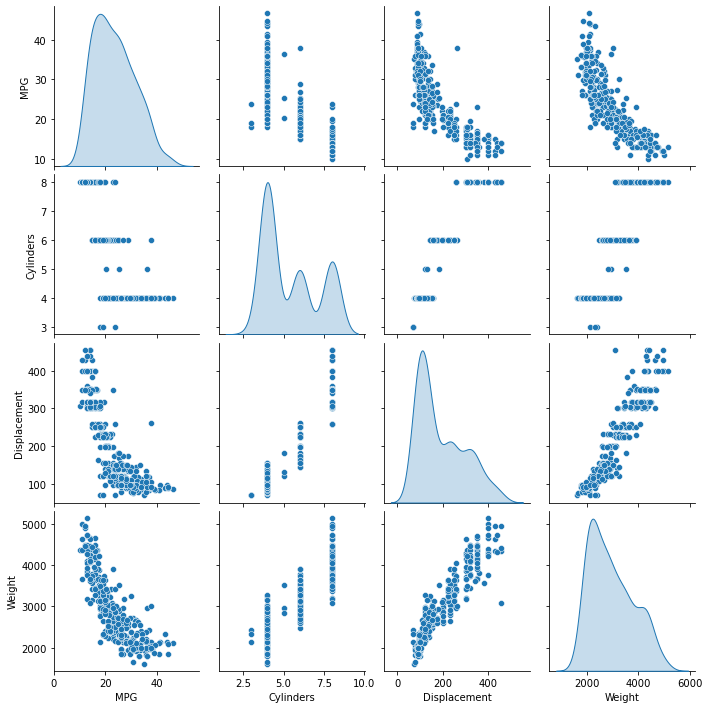

In [230]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

*Comment*: Looks like there is correlation between Weight and Displacement, Weight and MPG, Weight and Cylinders for example. The relationsship between Weight and MPG does however look more quadratic than linear. This is always an interesting issue to deal with in regression.

Also look at the overall statistics:

In [231]:
# Checking overall statistics of the explaining variables
train_stats = train_dataset.describe()
train_stats.drop(["MPG", "Europe", "Japan", "USA"], axis = 1, inplace = True)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,318.0,104.073418,38.368477,46.0,75.25,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0


*Comment*: Looking at the descriptive statistics of the explaining variables listed above, we can see for example that the number of cylinders go from 3 to 8 and that the standard deviation of Displacement looks quite high. Always good to know.

## Task 5:

In similar fashion explore the data from the downloaded additional data sets.  

In [232]:
# Split data into training and testing set
train_fires = data.sample(frac=0.8,random_state=0)
test_fires = data.drop(train_fires.index)

In [233]:
# Look at the test set
train_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69


In [234]:
# Inspect descriptive statistics
train_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,4.669082,4.350242,90.534300,109.481643,541.928986,9.136957,18.800000,44.142512,3.967874,0.021256,13.569348
std,2.270809,1.205531,5.965789,62.796135,251.496567,4.760950,5.857786,16.491291,1.739613,0.320007,69.034251
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,70.800000,425.775000,6.500000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.700000,108.000000,663.000000,8.400000,19.150000,41.000000,4.000000,0.000000,0.450000
75%,6.000000,5.000000,92.900000,141.200000,709.100000,11.075000,22.800000,53.000000,4.900000,0.000000,6.577500
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


*Comment*: Comparing the look at the full data and the descriptive statistics of the numerical variables, I note that month and day seem to be categorical values. I will inspect them a bit further and then dummy code them in an appropriate fashion. X and Y is, according to the description of the data, some kind of lang and lat coordinates. I'll try to plot them as well to look for patterns. Below is some of my data exploration.

In [235]:
# Check the months present in the dataset
months = train_fires['month'].unique()
months

array(['mar', 'jul', 'sep', 'aug', 'feb', 'dec', 'jun', 'oct', 'apr',
       'nov', 'jan', 'may'], dtype=object)

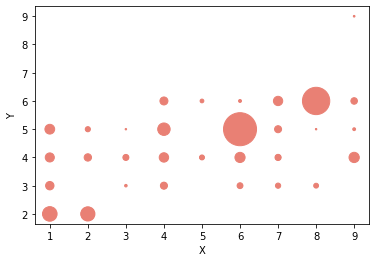

In [236]:
# Geographical inspection (X and Y is coordinates in the park)
train_fires.plot(kind = 'scatter', x = 'X', y = 'Y',
                s = 'area', color = '#E98074')
plt.savefig('long-lat-plot', transparent = True)

*Comment*: The coordinates are hard to grasp the meaning of. Turns out they are not raw lang and lat values but values on a grid covering the park where the data was collected. See below for more comments and exploration.

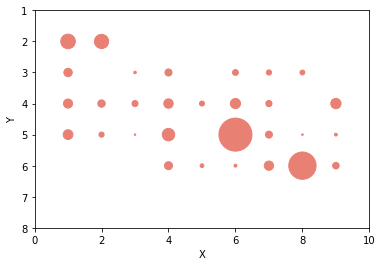

In [237]:
# Plotting a second similar plot to better compare with the map
train_fires.plot(kind = 'scatter', x = 'X', y = 'Y',
                s = 'area', color = '#E98074')
plt.axis([min(train_fires['X'])-1, max(train_fires['X'])+1, max(train_fires['Y'])-1, min(train_fires['Y'])-1])
plt.savefig('long-lat-plot2', transparent = True)

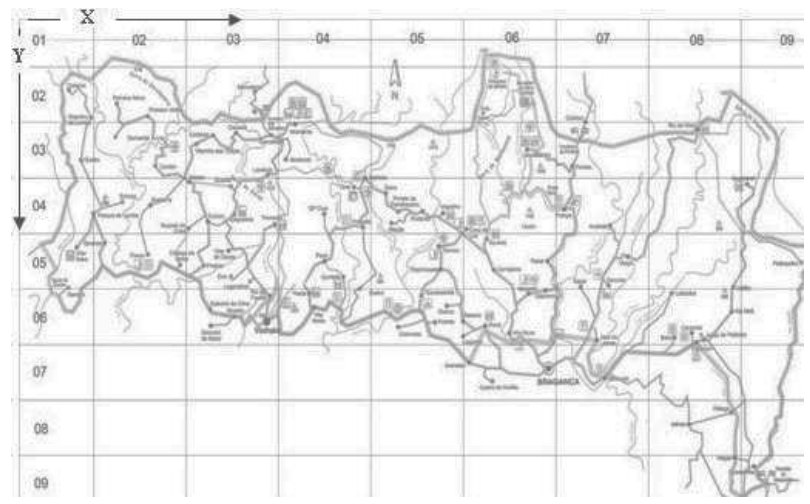

In [238]:
# This map is from the paper were they did the research on this dataset
from IPython.display import Image
Image("map.png")

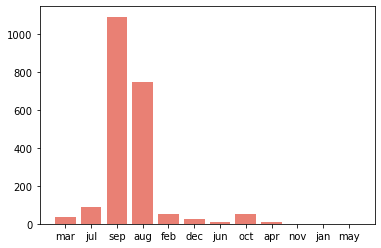

<Figure size 432x288 with 0 Axes>

In [239]:
# Season inspection
plt.bar(x = 'month', height = 'area', data = train_fires, color = '#E98074')
plt.show()
plt.savefig('months', transparent = True)

*Comment*: As expected late summer months seem to have larger fires

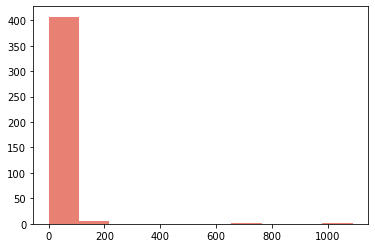

In [240]:
# Histogram of the outcome variable
plt.hist(train_fires['area'], color = '#E98074')

plt.savefig('outcome1', transparent = True)

*Comment*: Like our visualizations show, the outcome variable is very skewed towards zero. Hence a log transformation is needed. Because many values are even 0, I'm going to do ln(x+1) transformation (which is recommended on the UCI repo for this data). In order to be able to evaluate both the transformed and original outcome variable I'm saving the original outcome in a vector before transformation. Furthermore we have two variables that we need to dummy code - month and day. Let's go a ahead and do these pre-processing steps.

In [241]:
import numpy as np

In [242]:
# Log transformation of outcome variables 
# ln(x + 1) used bc some values are zero
y_train_original = train_fires['area']
train_fires['area'] = np.log(train_fires['area'] + 1)
y_test_original = test_fires['area']
test_fires['area'] = np.log(test_fires['area'] + 1)

(array([221.,  47.,  47.,  40.,  27.,  17.,   8.,   5.,   0.,   2.]),
 array([0.        , 0.69956196, 1.39912393, 2.09868589, 2.79824785,
        3.49780981, 4.19737178, 4.89693374, 5.5964957 , 6.29605766,
        6.99561963]),
 <a list of 10 Patch objects>)

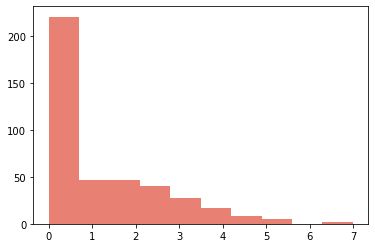

In [243]:
plt.hist(train_fires['area'], color = '#E98074')

*Comment*: Even if dummy variables are a good solution to dealing with categorical data, they can be messy if we have many categories. This is the case for both month and day. For example the months have a rather large number of unique values, and since we don't have too many observations, it is better to but them into bigger bins of seasons. This is also supported by our bar chart above of the relation between area and month. For days I'm just going to split the days into weekday and weekend, since that's the only reasonable effect of days that I can think of (people hanging out more in the parks during weekends).

In [244]:
# Function for converting month to season
def month_to_season(month):
    season = 'other'
    if month in ['dec', 'jan', 'feb']:
        season = 'winter'
    if month in ['mar', 'apr', 'may']:
        season = 'spring'
    if month in ['jun', 'jul', 'aug']:
        season = 'summer'
    if month in ['sep', 'oct', 'nov']:
        season = 'fall'
    return season

In [245]:
# Function for converting day to weekday/weekend
def day_to_typeofday(old_day):
    new_day = 'other'
    if old_day in ['mon', 'tue', 'wed', 'thu', 'fri']:
        new_day = 'weekday'
    if old_day in ['sat', 'sun']:
        new_day = 'weekend'
    return new_day

In [246]:
# Converting the months
train_fires['season'] = train_fires['month'].apply(month_to_season)
test_fires['season'] = test_fires['month'].apply(month_to_season)

In [247]:
# Converting the days
train_fires['day'] = train_fires['day'].apply(day_to_typeofday)
test_fires['day'] = test_fires['day'].apply(day_to_typeofday)

In [248]:
# Dropping months since it's now in the season column
train_fires.drop('month', inplace = True, axis = 1)
test_fires.drop('month', inplace = True, axis = 1)

In [249]:
# Inspection
train_fires.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season
213,7,3,weekday,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,3.344627,spring
435,2,5,weekend,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.000000,summer
343,8,6,weekday,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,1.156881,fall
230,4,4,weekday,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,4.494127,fall
171,8,6,weekday,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,1.305626,summer


In [250]:
# Dummy coding
train_fires = pd.get_dummies(train_fires, prefix='', prefix_sep='')
test_fires = pd.get_dummies(test_fires, prefix = '', prefix_sep ='')
train_fires.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,weekday,weekend,fall,spring,summer,winter
213,7,3,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,3.344627,1,0,0,1,0,0
435,2,5,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.000000,0,1,0,0,1,0
343,8,6,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,1.156881,1,0,1,0,0,0
230,4,4,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,4.494127,1,0,1,0,0,0
171,8,6,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,1.305626,1,0,0,0,1,0


## Task 6:

Normalize your dowloaded data sets. 

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

#### Solution
Normalizing the data is a bit trickier than what it might look like. Because of the dummy variables, we first have to pick them out of the data and then normalize the rest. Then we put the dummy variables back in. Doing this is another order would probably have been preferrable. 

In [251]:
# Splitting outcome value and explaining variable
mpg_train = train_dataset['MPG']
mpg_test = test_dataset['MPG']
train_dataset.drop('MPG', axis = 1, inplace = True)
test_dataset.drop('MPG', axis = 1, inplace = True)

In [252]:
# Pick out dummies
origin_list = ['Europe', 'Japan', 'USA']
dummies_train = train_dataset[origin_list]
train_dataset = train_dataset.drop(origin_list, axis = 1)
dummies_test = test_dataset[origin_list]
test_dataset = test_dataset.drop(origin_list, axis = 1)

In [253]:
# Normalize
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [254]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
65,1.528471,1.521380,1.275177,1.379315,-0.928344,-1.065117
132,-0.848320,-0.511125,-0.757742,-0.499348,0.502127,-0.525344
74,1.528471,1.049377,0.936357,1.574639,0.144509,-1.065117
78,-0.848320,-0.703780,-0.444986,0.017965,1.396171,-1.065117
37,0.340075,0.375086,-0.106166,0.383754,-0.034300,-1.335003


In [255]:
# Put dummies back in
normed_train_data = pd.concat([normed_train_data, 
                                dummies_train], axis = 1)

normed_test_data = pd.concat([normed_test_data, 
                               dummies_test], axis = 1)

In [256]:
# Check results
normed_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
9,1.528471,1.897057,2.239510,1.049040,-2.537624,-1.604889,0,0,1
25,1.528471,1.608075,2.891086,1.954633,-0.570726,-1.604889,0,0,1
28,1.528471,1.068642,2.317699,2.093136,1.038553,-1.604889,0,0,1
31,-0.848320,-0.771209,-0.236481,-0.871055,-0.570726,-1.335003,0,1,0
32,-0.848320,-0.915700,0.010320,-1.086504,1.217362,-1.335003,0,0,1


This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model. 

#### Solution
I'm now going to normalize the data. I will put both test and train set into through a regular standardizing provedure to give them mean 0 and std 1, in order to better replicate the study from which I got the data. That way it satifies the need to put both training and testing to the same distribution like explained above. To not accidentally normalize the dummy variables I'm taking them out before and then putting them back in just like above.

In [257]:
# Pick out dummies
dummies_list = ['fall', 'spring', 'summer', 'winter', 'weekend', 'weekday']
fires_dummies_train = train_fires[dummies_list]
fires_train_dataset = train_fires.drop(dummies_list, axis = 1)
fires_dummies_test = test_fires[dummies_list]
fires_test_dataset = test_fires.drop(dummies_list, axis = 1)

In [258]:
# Separate the outcome variable from the features
y_train = fires_train_dataset['area']
fires_train_dataset.drop('area', axis = 1, inplace = True)

y_test = fires_test_dataset['area']
fires_test_dataset.drop('area', axis = 1, inplace = True)

*Comment*: I know have the transformed outcome variable in *y_train* and *y_test*, but I will also do post-processing and transform the predictions into the original scale for evaluation. Because of this I have previously (when tranforming the data) saved the original values in *y_train_original* and *y_test_original*.

In [259]:
fires_test_dataset.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0
25,7,4,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0
28,6,3,93.4,145.4,721.4,8.1,30.2,24,2.7,0.0
31,6,3,88.6,91.8,709.9,7.1,11.2,78,7.6,0.0
32,6,3,88.6,69.7,706.8,5.8,20.6,37,1.8,0.0


In [260]:
# Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fires_train_scaled = pd.DataFrame(scaler.fit_transform(fires_train_dataset), 
                                  columns = fires_train_dataset.columns, 
                                  index = fires_train_dataset.index)

fires_test_scaled = pd.DataFrame(scaler.fit_transform(fires_test_dataset), 
                                 columns = fires_test_dataset.columns, 
                                 index = fires_test_dataset.index)

In [261]:
# Put dummies back in
fires_train_scaled = pd.concat([fires_train_scaled, 
                                fires_dummies_train], axis = 1)

fires_test_scaled = pd.concat([fires_test_scaled, 
                               fires_dummies_test], axis = 1)

In [262]:
# Check results
fires_train_scaled

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fall,spring,summer,winter,weekend,weekday
213,1.027712,-1.121394,-0.492450,-0.913288,-1.744195,-0.869986,-1.333172,0.112771,1.054454,-0.066504,0,1,0,0,0,1
435,-1.176811,0.539633,0.044591,-0.395114,-0.658176,-0.743809,0.854598,0.416328,-1.247690,-0.066504,0,0,1,0,1,0
343,1.468617,1.370147,0.162069,0.328735,1.055648,-0.344246,-0.495667,0.416328,0.306257,-0.066504,1,0,0,0,0,1
230,-0.295001,-0.290880,0.397024,0.379755,0.627690,0.013258,1.298988,-1.405015,0.306257,-0.066504,1,0,0,0,0,1
171,1.468617,1.370147,-0.828100,-0.304234,0.269399,-0.533512,-0.239287,0.355616,0.018489,-0.066504,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-1.617715,-0.290880,-0.156799,-0.404680,0.686210,-0.722779,0.034184,0.477039,-1.017475,-0.066504,1,0,0,0,1,0
48,-0.295001,-0.290880,-0.559580,-1.364498,-1.899853,-1.059253,-1.196437,-0.555055,-1.247690,-0.066504,0,1,0,0,0,1
341,1.468617,1.370147,0.229199,0.035369,0.909147,-0.554542,-0.529850,0.416328,-1.017475,-0.066504,1,0,0,0,0,1
373,0.145903,-0.290880,0.715892,1.800349,0.623709,1.001650,0.256379,-0.130075,-0.729707,-0.066504,0,0,1,0,0,1


## Project 2:  The model building for regression

### Build the regression model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [263]:
# Function for building the model
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [264]:
# Creating the model
model = build_model()

You can read about the implementation of sequential neural networks on Keras: https://keras.io/getting-started/sequential-model-guide/

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [265]:
# Check out model specificaiton
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [266]:
# Try out model by feeding it only 10 examples
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.4154301 ],
       [-0.11102501],
       [ 0.23557383],
       [-0.02224343],
       [-0.02482447],
       [-0.20317642],
       [-0.01572575],
       [-0.0771022 ],
       [ 0.58688545],
       [ 0.2817791 ]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [267]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, mpg_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [268]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.415999,1.032863,2.415998,7.503808,1.826124,7.503808,995
996,2.439146,1.070742,2.439146,7.741758,1.847006,7.741758,996
997,2.335446,1.048933,2.335446,7.499906,1.816888,7.499907,997
998,2.195332,1.010717,2.195332,7.577583,1.837405,7.577583,998
999,2.578553,1.107280,2.578553,7.720618,1.850827,7.720618,999


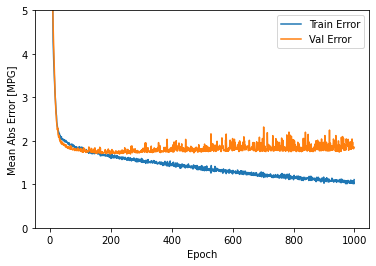

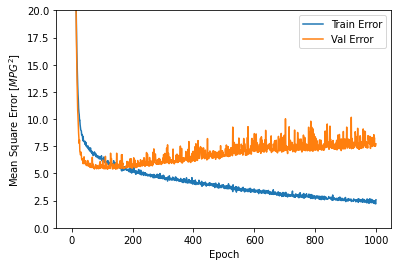

In [269]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).


....................................................................

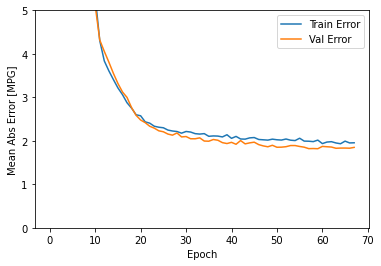

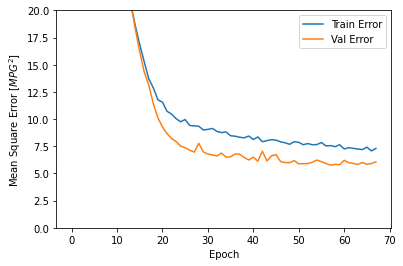

In [270]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, mpg_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [286]:
loss, mae, mse = model.evaluate(normed_test_data, mpg_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

80/80 - 0s - loss: 7.7067 - mean_absolute_error: 2.1665 - mean_squared_error: 7.7067
Testing set Mean Abs Error:  2.17 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

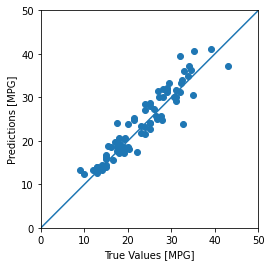

In [273]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(mpg_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

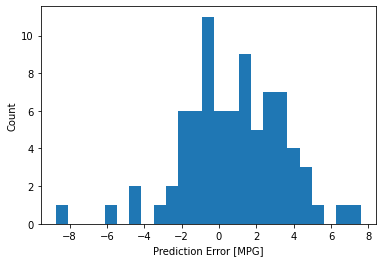

In [275]:
error = test_predictions - mpg_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Task 1: 

Using the standard linear regression model and fit it into the same data set. Compare performance of the linear model with the one build on the neural network. 

#### Solution
First I'm going to try to do in manually, and then I'll compare with sklearn build in linear regression task.

In [276]:
# Define class for linear regression
class MultipleLinearRegression:
    def __init__(self):
        self.model_name = 'Multiple Linear Regression'
    
    def fit(self, x, y):
        X = np.array(pd.merge(pd.DataFrame([1] * len(dataset)), x, left_index = True, right_index = True))
        Y = np.array(y)
        self.beta_hat = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, x):
        X = np.array(pd.merge(pd.DataFrame([1] * len(dataset)), x, left_index = True, right_index = True))
        return np.matmul(X, self.beta_hat)

In [277]:
# Fit model
reg_model = MultipleLinearRegression()
reg_model.fit(normed_train_data, mpg_train)

In [278]:
# Check coefficients
reg_model.beta_hat

array([ 5.60000000e+01,  1.32713071e+01, -3.04253666e+01,  1.50759437e+01,
       -6.32240476e+00,  2.80004933e-02,  1.45500118e+00, -4.00000000e+00,
       -7.60000000e+01, -1.20000000e+01])

In [280]:
# Build linreg with scikit-learn
from sklearn.linear_model import LinearRegression

regr = LinearRegression(normalize = False)
regr.fit(normed_train_data, mpg_train)
regr.coef_

array([-0.76991935,  2.53204955, -0.88007189, -5.7364271 , -0.02373914,
        3.00405401,  1.13125377,  0.8464283 , -1.97768207])

In [281]:
# Beta_0 is missing from the output above, it's here instead
regr.intercept_

24.50925594632886

*Comment*: As we can see, these coefficients doesn't match up. There's something I've done wrong. If you, the grader, can see what it is, please let me know in the feedback! :) I'll proceed with the model produced by sklearn.

In [283]:
# Get predictions
y_pred = regr.predict(normed_test_data)

In [288]:
# MSE and MAE
reg_mse = np.mean((mpg_test - y_pred)**2)
reg_mae = np.mean(np.abs(mpg_test - y_pred))

In [289]:
print('Linear Regression MSE:', reg_mse)
print('Neural Network MSE:', mse)
print('')
print('Linear Regression MAE', reg_mae)
print('Neural Network MAE', mae)

Linear Regression MSE: 9.493585087871262
Neural Network MSE: 7.7067046

Linear Regression MAE 2.4563907272970464
Neural Network MAE 2.1665454


*Comment*: As we can see above, the NN is performing a bit better than the linear regression. However, it's not a lot better. Some reasons for this could be that there are truly linear patterns in the data (so the NN doesn't have much advatage as in the case of non-linear dependencies) and that the data is rather small.

## Task 2: 

Build another neural network model and do analogous analysis. 

In [294]:
# Second model
def build_model2():
    model = keras.Sequential([
        layers.Dense(14, activation='relu', input_shape=[len(normed_train_data.keys())]),
        layers.Dense(14, activation='relu'),
        layers.Dense(14, activation='relu'),
        layers.Dense(14, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    
    return model


....................................................................................................
.......................

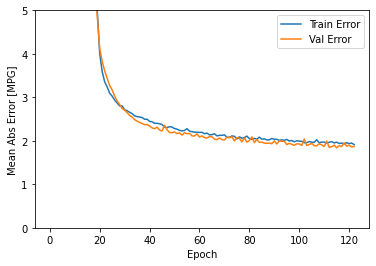

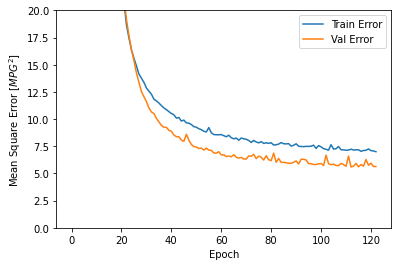

In [295]:
# Fit with early stopping
model2 = build_model2()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model2.fit(normed_train_data, mpg_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [298]:
# Evaluate
loss, mae, mse = model2.evaluate(normed_test_data, mpg_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

80/80 - 0s - loss: 7.2331 - mean_absolute_error: 2.0713 - mean_squared_error: 7.2331
Testing set Mean Abs Error:  2.07 MPG


*Comment*: The MSE and MAE have been shrunken a little bit in this network architecture.

## Task 3:

Perform similar analysis on the additionally downloaded data and draw conclusions. 

#### Solution
Below I've defined a neural network for the fires data. I have changed the metrics to Root Mean Squared Error (RMSE) and MAE (like before) in order to be able to compare with the paper that the dataset was originally analyzed in. 

In [299]:
# Build model
def define_compile_model():
    model = keras.Sequential([
        layers.Dense(64, 
                     activation = 'relu', 
                     input_shape = [len(fires_train_scaled.columns)]),
        layers.Dense(64,
                    activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mae',
                optimizer=optimizer,
                metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])
    
    return model

In [328]:
# Fit model
fires_model = define_compile_model()

history = fires_model.fit(fires_train_scaled,
                          y_train, 
                          epochs = 1000,
                          validation_split = 0.2,
                          verbose = 0,
                          callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [302]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

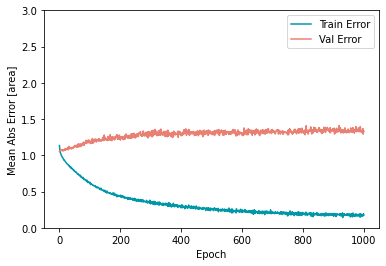

In [303]:
def plot_history1(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [area]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error', color = '#0097a7')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error', color = '#E98074')
  plt.ylim([0,3])
  plt.legend()

plot_history1(history)
plt.savefig('mae', transparent = True)

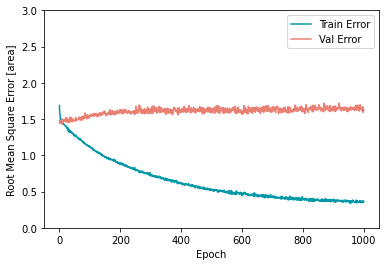

In [304]:
def plot_history2(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Root Mean Square Error [area]')
  plt.plot(hist['epoch'], hist['root_mean_squared_error'],
           label='Train Error', color = '#0097a7')
  plt.plot(hist['epoch'], hist['val_root_mean_squared_error'],
           label = 'Val Error', color = '#E98074')
  plt.ylim([0,3])
  plt.legend()


plot_history2(history)
plt.savefig('rmse', transparent = True)

*Comment*: As can be seen above, the model almost immediately starts to overfit. Compared to the previous problem and data (cars), there is not even an initial decline in the model. I will try to investigate why that is.

In [305]:
# Inspecting the data so everything looks correct
hist.head()

,loss,root_mean_squared_error,mean_absolute_error,val_loss,val_root_mean_squared_error,val_mean_absolute_error,epoch
0,1.134803,1.686191,1.134803,1.050039,1.476801,1.050039,0
1,1.089129,1.587932,1.089129,1.053593,1.481822,1.053593,1
2,1.059367,1.564241,1.059367,1.063037,1.440464,1.063037,2
3,1.038839,1.497501,1.038839,1.067468,1.445221,1.067468,3
4,1.025262,1.503785,1.025262,1.071585,1.438454,1.071585,4


In [329]:
# Inspecting further with the help of early stopping
del fires_model
fires_model = define_compile_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = fires_model.fit(fires_train_scaled, y_train, epochs=1000,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])


.............

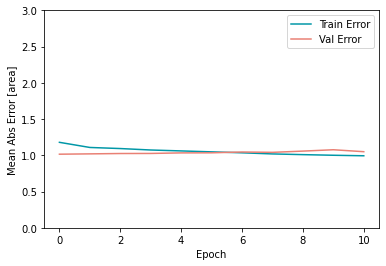

In [307]:
plot_history1(history)

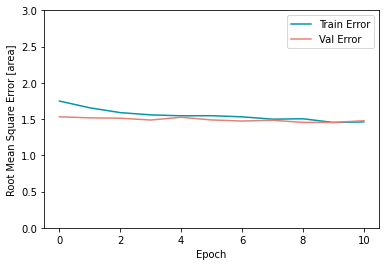

In [308]:
plot_history2(history)

*Comment*: Again we can see the pattern of immediate fit (no initial decline in val error). I'll proceed to evaluate the model to compare with the results in the paper.

#### Note
So, in the paper whose work I'm following (Cortez % Morais 2007) they post-process the data after prediction, meaning they transform it back to the original state with the inverse function of ln(x+1). The inverse of ln(x+1) is exp(y) - 1. There's a function for this in numpy, *np.expm1* which I can easily use. The reason I'm doing this is to be able to compare my neural network with the SVM algorithm used in the paper. Below I'm doing this evaluation step by step.

In [309]:
# Predict on test data
y_pred = fires_model.predict(fires_test_scaled)

In [310]:
# Reshaping the tensors that the model return
y_pred = y_pred.reshape(len(y_pred))

In [311]:
# Transform predictions
y_pred_final = np.expm1(y_pred)

In [313]:
# Calculating MAE of transformed data
np.mean(np.abs(y_test - y_pred))

1.4376585228146117

In [314]:
# Calculating MAE of original data
np.mean(np.abs(y_test_original - y_pred_final))

15.987882145595812

In [317]:
# Calculating RMSE of the tranformed data
np.sqrt(np.mean((y_test - y_pred)**2))

1.8810493052657171

In [318]:
# Calculating RMSE of the original data
np.sqrt(np.mean((y_test_original - y_pred_final)**2))

106.11618111805832

(array([52., 10., 11., 11., 10.,  1.,  2.,  4.,  0.,  2.]),
 array([0.        , 0.56331096, 1.12662192, 1.68993289, 2.25324385,
        2.81655481, 3.37986577, 3.94317673, 4.5064877 , 5.06979866,
        5.63310962]),
 <a list of 10 Patch objects>)

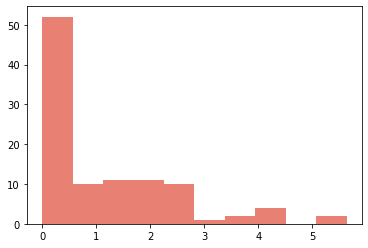

In [319]:
# Histogram of the original test data
plt.hist(y_test_original, color = '#E98074')

(array([102.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-7.7145201e-01,  1.0623461e+02,  2.1324068e+02,  3.2024673e+02,
         4.2725281e+02,  5.3425885e+02,  6.4126495e+02,  7.4827100e+02,
         8.5527704e+02,  9.6228314e+02,  1.0692892e+03], dtype=float32),
 <a list of 10 Patch objects>)

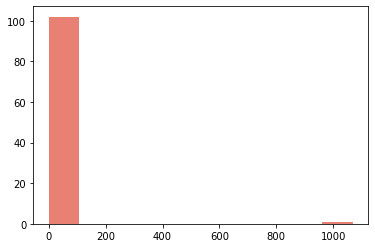

In [321]:
# Histogram of the predictions
plt.hist(y_pred_final, color = '#E98074')

*Comment*: As we can see above, none of our really large values ended up in the test set. This makes the predictions very unstable. As we can see, it predicts low values for almost all predictions and then one really, really high, which then has a large effect on the test error. I've noticed this instability becuase when I ran the analysis earlier, the large prediction wasn't there, and so the error rate was much lower.

#### Comparison with the results in the paper
So, for comparison, Cortez and Morais (2007) achieves an MAE of 12.7 and and RMSE of 63.7 with their SVM regression algorithm. So this neural network is actually doing worse. Next I'll build another neural network to see if it can be improved. Finally I will do cross-validation to validate the results, as this hold-out approach of splitting the data into one train and one test set have proven to be very sensitive to where the really large values end up.

In [322]:
# Build model
def define_compile_model2():
    model = keras.Sequential([
        layers.Dense(64, 
                     activation = 'relu', 
                     input_shape = [len(fires_train_scaled.columns)]),
        layers.Dense(100,
                    activation = 'relu'),
        layers.Dense(52,
                    activation = 'relu'),
        layers.Dense(14,
                    activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mae',
                optimizer=optimizer,
                metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])
    
    return model

In [330]:
fires_model2 = define_compile_model2()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = fires_model2.fit(fires_train_scaled, y_train, epochs=1000,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])


..............

In [333]:
# Predict on train data
y_pred = fires_model2.predict(fires_test_scaled)

# Transform predictions
y_pred = y_pred.reshape(len(y_pred))
y_pred_final = np.expm1(y_pred)

# Calculate MAE
mae = np.mean(np.abs(y_test_original - y_pred_final))

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test_original - y_pred_final)**2))

print(mae)
print(rmse)

1.6325812682603131
2.425220160918662


*Comment*: Now the predictions are a LOT better. We should be suspicious of this. Let's inspect the predictions with a histogram like we did before.

(array([68., 19.,  7.,  2.,  1.,  3.,  1.,  1.,  0.,  1.]),
 array([-0.12956654,  1.1571716 ,  2.4439096 ,  3.7306478 ,  5.017386  ,
         6.3041244 ,  7.5908623 ,  8.877601  , 10.164339  , 11.4510765 ,
        12.737815  ], dtype=float32),
 <a list of 10 Patch objects>)

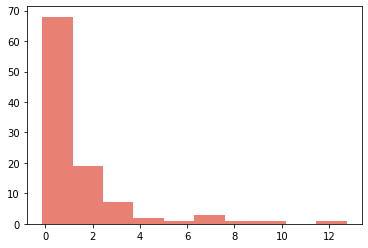

In [334]:
# Histogram of the predictions
plt.hist(y_pred_final, color = '#E98074')

*Comment*: As expected, it's really just about that one prediction of 1000 that the model did before. Now it makes no such high predictions and consequently the errors are much lower, since there are no high values in the test set. 

#### CV Approach
Because of the skewness in the distribution of the outcome variable, I will now turn to cross-validation instead. For this I'm going to put the data back together into one big set. This is how they did it in the paper. Otherwise it would be good to keep an extra test set on the side, but I'll discard that for now.

In [336]:
# Put data into one dataframe
all_scaled = pd.concat([fires_train_scaled, fires_test_scaled], axis = 0)
all_scaled

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fall,spring,summer,winter,weekend,weekday
213,1.027712,-1.121394,-0.492450,-0.913288,-1.744195,-0.869986,-1.333172,0.112771,1.054454,-0.066504,0,1,0,0,0,1
435,-1.176811,0.539633,0.044591,-0.395114,-0.658176,-0.743809,0.854598,0.416328,-1.247690,-0.066504,0,0,1,0,1,0
343,1.468617,1.370147,0.162069,0.328735,1.055648,-0.344246,-0.495667,0.416328,0.306257,-0.066504,1,0,0,0,0,1
230,-0.295001,-0.290880,0.397024,0.379755,0.627690,0.013258,1.298988,-1.405015,0.306257,-0.066504,1,0,0,0,0,1
171,1.468617,1.370147,-0.828100,-0.304234,0.269399,-0.533512,-0.239287,0.355616,0.018489,-0.066504,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.270275,0.692643,1.641247,0.861260,0.386230,2.286626,2.391861,-1.210842,-0.566075,-0.138768,0,0,1,0,0,1
506,-1.480635,-1.608718,-0.028367,0.735801,0.777202,-0.404584,-0.133915,1.804429,2.169382,-0.138768,0,0,1,0,0,1
509,0.133179,-0.074478,-0.028367,0.735801,0.777202,-0.404584,0.331831,1.676119,1.713472,8.198861,0,0,1,0,0,1
510,0.536632,0.692643,-0.028367,0.735801,0.777202,-0.404584,-0.187655,1.098727,0.599027,-0.138768,0,0,1,0,0,1


In [338]:
# Put labels/outcome variables together
all_y = np.concatenate([y_train, y_test], axis = None)
all_y.shape

(517,)

In [339]:
# Remove the last 7 observations so that we can reshape it for CV
all_scaled2 = all_scaled[:-7]
print(len(all_scaled2))
all_scaled2.reset_index(inplace = True)

510


In [340]:
# Remove last 7 obs in labels as well
all_y = all_y[:-7]

In [341]:
# Remove the index label that was accidnetally created when we used reset index
all_scaled2 = all_scaled2.drop('index', axis =1)

In [342]:
# Shuffle and rearrange data
perm = np.random.permutation(len(all_scaled2))
rearr = perm.reshape(10, 51)

In [343]:
# Create cross validation set
CV_data = np.array(all_scaled2)[rearr]
CV_y = all_y[rearr]
print(len(CV_data[0]))

51


In [344]:
# Prepare cross validation set 1
CVin = [list(rearr[0]), list(rearr[1])]
for k in range(8):
    CVin[1] = CVin[1] + list(rearr[k+2]%10)
CVin = [CVin]

In [345]:
# Same for the rest of the sets
for i in range(9):
    C = [list(rearr[i+1]), list(rearr[(i+2)%10])]
    for k in range(8):
        C[1] = C[1] + list(rearr[(i+3+k)%10])
    CVin = CVin + [C]

In [347]:
# Cross validation on original model
test_mae_list = []
test_rmse_list = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVx = np.array(all_scaled2)[CVin[k][0]]
    testCVy = all_y[CVin[k][0]]
    trainCVx = np.array(all_scaled2)[CVin[k][1]]
    trainCVy = all_y[CVin[k][1]]
    
    # Delete the old model
    del model 
    
    # Redefine model
    model = define_compile_model()
    
    # Fit model
    model.fit(trainCVx, trainCVy, epochs=1000,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])
    
    # Predict on val data
    y_pred = model.predict(testCVx)

    # Transform predictions and original labels
    y_pred = y_pred.reshape(len(y_pred))
    y_pred_final = np.expm1(y_pred)
    y_true_original = np.expm1(testCVy)

    # Calculate MAE/MAD
    mae = np.mean(np.abs(y_true_original - y_pred_final))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true_original - y_pred_final)**2))
    
    # Record the results in our lists
    test_mae_list.append(mae)
    test_rmse_list.append(rmse)


.........................
.............
...........
......................
..............................................
.............
..............................
.................................
...........
...........

In [348]:
# Check CV MAE
np.mean(test_mae_list)

13.310254301503559

In [349]:
# Check CV RMSE
np.mean(test_rmse_list)

47.16709012406989

*Comment*: Now we are achieving similar results as the paper this. That is quite impressive. Our RMSE is even lower, but I suspect that might be due to randomness. The paper did a cross-validation of several runs, which I feel is beyond the scope of this project. Furthermore, we can do the same thing on the second model, as can be seen below.

In [350]:
# Cross validation on original model
test_mae_list = []
test_rmse_list = []

for k in range(10):
    
    # Pick our training and test set needed for the CV procedure
    testCVx = np.array(all_scaled2)[CVin[k][0]]
    testCVy = all_y[CVin[k][0]]
    trainCVx = np.array(all_scaled2)[CVin[k][1]]
    trainCVy = all_y[CVin[k][1]]
    
    # Delete the old model
    del model 
    
    # Redefine model
    model = define_compile_model2()
    
    # Fit model
    model.fit(trainCVx, trainCVy, epochs=1000,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])
    
    # Predict on val data
    y_pred = model.predict(testCVx)

    # Transform predictions and original labels
    y_pred = y_pred.reshape(len(y_pred))
    y_pred_final = np.expm1(y_pred)
    y_true_original = np.expm1(testCVy)

    # Calculate MAE/MAD
    mae = np.mean(np.abs(y_true_original - y_pred_final))

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true_original - y_pred_final)**2))
    
    # Record the results in our lists
    test_mae_list.append(mae)
    test_rmse_list.append(rmse)


.................................
.............
...........
...................
...........................
............
.........................
.............................
...........
............

In [351]:
# Check CV MAE
np.mean(test_mae_list)

13.149000548954458

In [352]:
# Check CV RMSE
np.mean(test_rmse_list)

46.089691974732474

*Comment*: Again we are achieving similar results as the study did. So in conclusion, a modern keras NN can achieve the same results as the best SVM algorithm did in the work by Cortez & Morais in 2007. With tuning, it could probably exceed it. However, great causion is needed when evaluating this data. Because of the nature of the outcome variable (continous, many 0 values, skewed, etc.) one has to be careful with drawing conclusions on the possibility to predict forest fire area. That was all for this lab!

## Grader box: 

In what follows the grader will put the values according the following check list:

* 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)
* 2 Have all commands been experimented with? (0 or 0.5pt)
* 3 Have all experiments been briefly commented? (0 or 0.5pt)
* 4 Have all tasks been attempted? (0, 0.5, or 1pt)
* 5 How many of the tasks have been completed? (0, 0.5, or 1pt)
* 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)
* 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)
* 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt) 


#### 1 Have all commands included in a raw notebook been evaluated? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A
#### Grader's comment (if desired): 
N/A

#### 2 Have all commands been experimented with? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 3 Have all experiments been briefly commented? (0 or 0.5pt)

#### Grader's comment (if desired): 
N/A

#### 4 Have all tasks been attempted? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 5 How many of the tasks have been completed? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 6 How many of the tasks (completed or not) have been commented? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 7 Have been the conclusions from performing the tasks clearly stated? (0, 0.5, or 1pt)

#### Grader's comment (if desired): 
N/A

#### 8 Have been the overall organization of the submitted Lab notebook been neat and easy to follow by the grader? (0, or 0.5pt)

#### Grader's comment (if desired): 
N/A

### Overall score

### Score and grader's comment (if desired): 
N/A